# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import seaborn as sns

%matplotlib inline

# Create a flow direction grid from a raster

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [2]:
grid = Grid.from_raster('../data/n30w100_dir',
                        data_name='dir', input_type='ascii')

# Specify flow direction values

In [3]:
         #N    NE    E    SE    S    SW    W    NW
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)

# Delineate catchment

In [4]:
# Specify pour point
x, y = -97.2937, 32.7371

# Delineate the catchment
grid.catchment(x, y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label')

In [5]:
# Clip the bounding box to the catchment
grid.clip_to('catch', precision=5)

Unalignable bbox provided, rounding to [-97.4025      32.60666667 -97.26166667  32.73916667]


# Get flow accumulation

In [6]:
grid.accumulation(direction_name='catch', dirmap=dirmap, pad_inplace=False, out_name='acc')

# Extract river network

In [7]:
branches, yx = grid.extract_river_network(threshold=200)

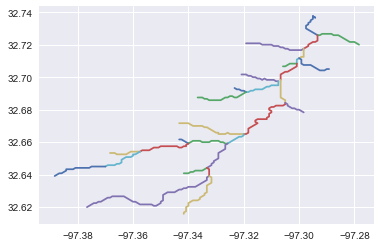

In [8]:
for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0])

In [9]:
branches, yx = grid.extract_river_network(threshold=50)

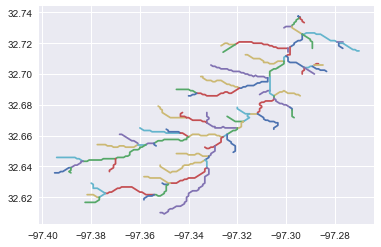

In [10]:
for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0])

In [11]:
branches, yx = grid.extract_river_network(threshold=2)

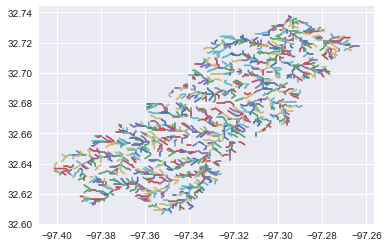

In [12]:
for branch in branches:
    line = yx[branch]
    plt.plot(line[:, 1], line[:, 0])